Dataset already downloaded
['US_Accidents_Dec20_updated.csv']
Number of Raw Data: DataFrames extracted: 1
Deleted: 34680 values (2.287502374569939% of raw data) because of invalid time format


################################################################### 

column: Side. Number of possible values: 2 
	Values = ['R' 'L']

column: State. Number of possible values: 49 
	Values = ['OH' 'IN' 'KY' 'WV' 'PA' 'MI' 'CA' 'MN' 'LA' 'NE' 'MO' 'IA' 'ND' 'CO'
 'KS' 'TX' 'WI' 'OK' 'WY' 'SD' 'MS' 'AR' 'IL' 'MA' 'RI' 'ME' 'NY' 'TN'
 'FL' 'MD' 'NC' 'GA' 'VA' 'CT' 'NJ' 'DE' 'NH' 'SC' 'VT' 'DC' 'AL' 'MT'
 'ID' 'UT' 'AZ' 'NM' 'NV' 'WA' 'OR']

column: Timezone. Number of possible values: 4 
	Values = ['US/Eastern' 'US/Pacific' 'US/Central' 'US/Mountain']

column: Wind_Direction. Number of possible values: 23 
	Values = ['SW' 'WSW' 'West' 'NNW' 'WNW' 'NW' 'W' 'SSW' 'East' 'SE' 'North' 'ENE'
 'NNE' 'NE' 'SSE' 'CALM' 'South' 'ESE' 'S' 'Variable' 'VAR' 'N' 'E']

column: Weather_Condition. Number of possib

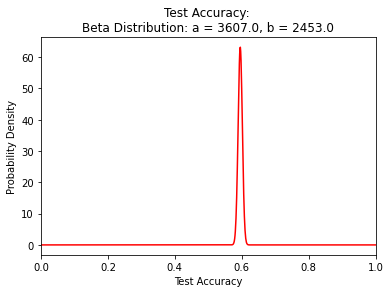

Overall Accuracy: 0.595
User's Accuracy: [0.577 0.622 0.584]
Producer's Accuracy: [0.545 0.668 0.572]
Kappa Coefficient: 0.392642

Time: Random Forest: 9.989318132400513 seconds
Accuracy: 0.6525255860019809


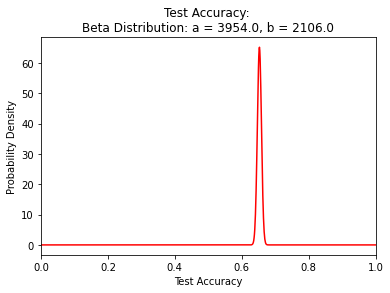

Overall Accuracy: 0.653
User's Accuracy: [0.575 0.698 0.703]
Producer's Accuracy: [0.674 0.693 0.593]
Kappa Coefficient: 0.479378



In [ ]:
%run mainSVC.py 0 1 0